<a href="https://colab.research.google.com/github/vcoelh/ML/blob/main/multi_class_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples = m, centers = centers, cluster_std= std, random_state= 30)

/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


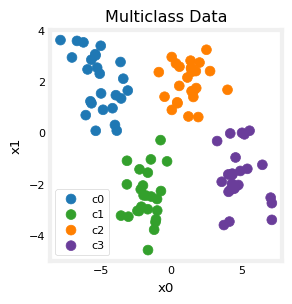

In [ ]:
plt_mc(X_train, y_train, classes, centers, std = std)

In [ ]:
## mostra quantas classes há no dataset
print(f' tipos de classes: {np.unique(y_train)}')
### como elas são representadas 
print(f' representação das classes: {y_train[:10]}')
### shape de X_train e de y_train
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')

 tipos de classes: [0 1 2 3]
 representação das classes: [3 3 3 0 3 3 3 3 2 0]
X_train: (100, 2), y_train: (100,)


In [ ]:
from keras.mixed_precision.loss_scale_optimizer import optimizer
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(units = 2, activation = 'relu', name = 'L1'),
        tf.keras.layers.Dense(units = 4, activation = 'linear', name = 'L2')
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train, y_train, epochs = 200
)

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 1.9770
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.9477
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.9191
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.8932
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.8689
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.8416
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.8175
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.7926
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 1.7698
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 1.7425
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 1.7193
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 1.6958
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

184/184 [==============================] - 0s 1ms/step


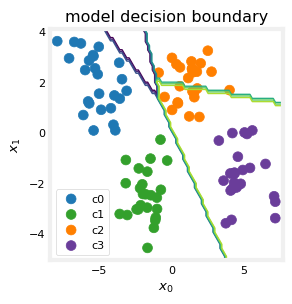

In [ ]:
plt_cat_mc(X_train, y_train, model, classes)

In [ ]:
l1 = model.get_layer("L1")
w1, b1 = l1.get_weights()
# print(f'w1: {w1}, b1: {b1}')

w1: [[1.05 0.41]
 [0.77 0.57]], b1: [ 0.45 -0.26]


/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


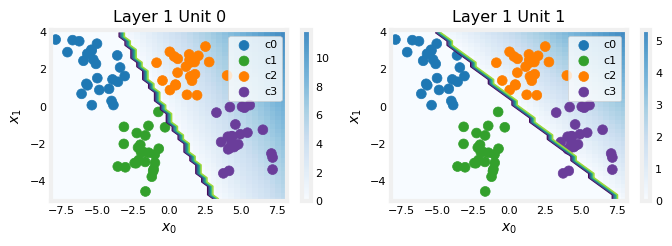

In [ ]:
plt_layer_relu(X_train, y_train.reshape(-1), w1, b1, classes)

In [ ]:
l2 = model.get_layer("L2")
w2, b2 = l2.get_weights()
print(f' w2: {w2}, \nb2: {b2}')

 w2: [[-1.07 -1.05  0.21  0.34]
 [ 0.72 -1.06 -0.41 -0.77]], 
b2: [ 0.24  0.44 -0.39 -0.34]


/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


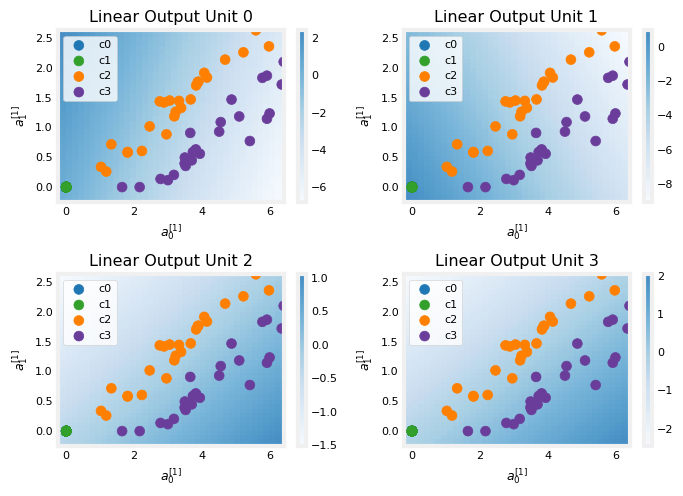

In [ ]:
Xl2 = np.maximum(0, np.dot(X_train, w1) + b1)


plt_output_layer_linear(Xl2, y_train.reshape(-1,), w2, b2, classes, x0_rng=(-0.25, np.amax(Xl2[:,0])), x1_rng=(-0.25, np.amax(Xl2[:,1])) )